In [22]:
import numpy as np
import os
import pandas as pd

In [5]:
url = 'https://www.kaggle.com/c/titanic/data/train.csv'

In [18]:
raw = os.path.join(os.path.pardir, 'data','raw')
print(raw)
train = os.path.join(raw,'train.csv')
print(train)
test = os.path.join(raw, 'test.csv')

..\data\raw
..\data\raw\train.csv


In [34]:
train_df = pd.read_csv(train, index_col='PassengerId') # PassengerId column will be used as index column
test_df = pd.read_csv(test, index_col='PassengerId')

In [35]:
test_df

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
...             ...                                           ...     ...   
1305              3                            Spector, Mr. Woolf    male   
1306              1                  Oliva y Ocana, Dona. Fermina  female   
1307              3                  Saether, Mr. Simon Sivertsen    male   
1308              3                           Ware, Mr. Frederick    male   
1309              3                      Peter, Master. Michael J    male   

              Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
PassengerId                                                                   
892          34.5      0      0              330911    7.8292   NaN        Q  
893          47.0      1      0              363272    7.0000   NaN        S  
894          62.0      0      0              240276    9.6875   NaN        Q  
895          27.0      0      0              315154    8.6625   NaN        S  
896          22.0      1      1             3101298   12.2875   NaN        S  
...           ...    ...    ...                 ...       ...   ...      ...  
1305          NaN      0      0           A.5. 3236    8.0500   NaN        S  
1306         39.0      0      0            PC 17758  108.9000  C105        C  
1307         38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1308          NaN      0      0              359309    8.0500   NaN        S  
1309          NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 10 columns]

In [39]:
type(train_df)
type(test_df)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [44]:
test_df['Survived'] = -888
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [45]:
df = pd.concat((train_df, test_df), axis =0)

In [47]:
df.head(10)


Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      McCarthy, Mr. Timothy J    male  54.0   
8                               Palsson, Master. Gosta Leonard    male   2.0   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
10                         Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
6                0      0            330877   8.4583   NaN        Q  
7                0      0             17463  51.8625   E46        S  
8                3      1            349909  21.0750   NaN        S  
9                0      2            347742  11.1333   NaN        S  
10               1      0            237736  30.0708   NaN        C

In [50]:
df.tail(10)


Survived  Pclass  \
PassengerId                     
1300             -888       3   
1301             -888       3   
1302             -888       3   
1303             -888       1   
1304             -888       3   
1305             -888       3   
1306             -888       1   
1307             -888       3   
1308             -888       3   
1309             -888       3   

                                                        Name     Sex   Age  \
PassengerId                                                                  
1300                         Riordan, Miss. Johanna Hannah""  female   NaN   
1301                               Peacock, Miss. Treasteall  female   3.0   
1302                                  Naughton, Miss. Hannah  female   NaN   
1303         Minahan, Mrs. William Edward (Lillian E Thorpe)  female  37.0   
1304                          Henriksson, Miss. Jenny Lovisa  female  28.0   
1305                                      Spector, Mr. Woolf    male   NaN   
1306                            Oliva y Ocana, Dona. Fermina  female  39.0   
1307                            Saether, Mr. Simon Sivertsen    male  38.5   
1308                                     Ware, Mr. Frederick    male   NaN   
1309                                Peter, Master. Michael J    male   NaN   

             SibSp  Parch              Ticket      Fare Cabin Embarked  
PassengerId                                                             
1300             0      0              334915    7.7208   NaN        Q  
1301             1      1  SOTON/O.Q. 3101315   13.7750   NaN        S  
1302             0      0              365237    7.7500   NaN        Q  
1303             1      0               19928   90.0000   C78        Q  
1304             0      0              347086    7.7750   NaN        S  
1305             0      0           A.5. 3236    8.0500   NaN        S  
1306             0      0            PC 17758  108.9000  C105        C  
1307             0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1308             0      0              359309    8.0500   NaN        S  
1309             1      1                2668   22.3583   NaN        C

In [51]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [52]:
df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [54]:
df[['Name','Sex']]

Name     Sex
PassengerId                                                           
1                                      Braund, Mr. Owen Harris    male
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female
3                                       Heikkinen, Miss. Laina  female
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female
5                                     Allen, Mr. William Henry    male
...                                                        ...     ...
1305                                        Spector, Mr. Woolf    male
1306                              Oliva y Ocana, Dona. Fermina  female
1307                              Saether, Mr. Simon Sivertsen    male
1308                                       Ware, Mr. Frederick    male
1309                                  Peter, Master. Michael J    male

[1309 rows x 2 columns]

In [59]:
df.loc[5:10,]

Survived  Pclass  \
PassengerId                     
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   

                                                          Name     Sex   Age  \
PassengerId                                                                    
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      McCarthy, Mr. Timothy J    male  54.0   
8                               Palsson, Master. Gosta Leonard    male   2.0   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
10                         Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   

             SibSp  Parch  Ticket     Fare Cabin Embarked  
PassengerId                                                
5                0      0  373450   8.0500   NaN        S  
6                0      0  330877   8.4583   NaN        Q  
7                0      0   17463  51.8625   E46        S  
8                3      1  349909  21.0750   NaN        S  
9                0      2  347742  11.1333   NaN        S  
10               1      0  237736  30.0708   NaN        C

In [60]:
df.loc[5:10, 'Pclass':'Age']

Pclass                                               Name  \
PassengerId                                                              
5                 3                           Allen, Mr. William Henry   
6                 3                                   Moran, Mr. James   
7                 1                            McCarthy, Mr. Timothy J   
8                 3                     Palsson, Master. Gosta Leonard   
9                 3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
10                2                Nasser, Mrs. Nicholas (Adele Achem)   

                Sex   Age  
PassengerId                
5              male  35.0  
6              male   NaN  
7              male  54.0  
8              male   2.0  
9            female  27.0  
10           female  14.0

In [61]:
df.loc[5:10, ['Survived','Fare','Embarked']]

Survived     Fare Embarked
PassengerId                            
5                   0   8.0500        S
6                   0   8.4583        Q
7                   0  51.8625        S
8                   0  21.0750        S
9                   1  11.1333        S
10                  1  30.0708        C

In [62]:
df.iloc[5:10, 3:8]

Sex   Age  SibSp  Parch  Ticket
PassengerId                                    
6              male   NaN      0      0  330877
7              male  54.0      0      0   17463
8              male   2.0      3      1  349909
9            female  27.0      0      2  347742
10           female  14.0      1      0  237736

In [64]:
male_passengers = df.loc[df['Sex'] == 'male']
print('Number of male" {0}'.format(len(male_passengers)))

Number of male" 843


In [69]:
male_first = df.loc[(df.Sex == 'male') & (df.Pclass == 1)]

In [70]:
len(male_first)

179

In [71]:
df.describe()

Survived       Pclass          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean   -283.301757     2.294882    29.881138     0.498854     0.385027   
std     414.337413     0.837836    14.413493     1.041658     0.865560   
min    -888.000000     1.000000     0.170000     0.000000     0.000000   
25%    -888.000000     2.000000    21.000000     0.000000     0.000000   
50%       0.000000     3.000000    28.000000     0.000000     0.000000   
75%       1.000000     3.000000    39.000000     1.000000     0.000000   
max       1.000000     3.000000    80.000000     8.000000     9.000000   

              Fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200

### Statistics

### Centrality measure(mean, average, ...)

### Spread data(range "max-min", percentiles, quartiles, Box-Whisker plot, variance, standard deviation)


In [74]:
print(df.Fare.mean())

33.2954792813456


In [76]:
print(df.Fare.median()) #except extreme, middle value

14.4542


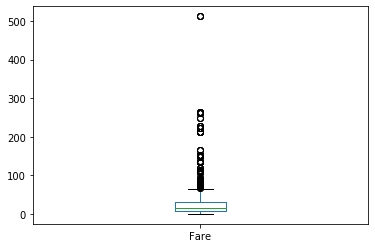

In [92]:
%matplotlib inline
df.Fare.plot(kind='box')

In [81]:
df.Fare.quantile(.25)

7.8958

In [84]:
df.Fare.quantile(.5)

14.4542

In [85]:
df.Fare.quantile(.9)

78.05081999999999

In [87]:
df.Fare.var()  #variance

2678.959737892894

In [86]:
df.Fare.std() #standard dev

51.75866823917414

In [88]:
df.describe(include='all')

Survived       Pclass                  Name   Sex          Age  \
count   1309.000000  1309.000000                  1309  1309  1046.000000   
unique          NaN          NaN                  1307     2          NaN   
top             NaN          NaN  Connolly, Miss. Kate  male          NaN   
freq            NaN          NaN                     2   843          NaN   
mean    -283.301757     2.294882                   NaN   NaN    29.881138   
std      414.337413     0.837836                   NaN   NaN    14.413493   
min     -888.000000     1.000000                   NaN   NaN     0.170000   
25%     -888.000000     2.000000                   NaN   NaN    21.000000   
50%        0.000000     3.000000                   NaN   NaN    28.000000   
75%        1.000000     3.000000                   NaN   NaN    39.000000   
max        1.000000     3.000000                   NaN   NaN    80.000000   

              SibSp        Parch    Ticket         Fare        Cabin Embarked  
count   1309.000000  1309.000000      1309  1308.000000          295     1307  
unique          NaN          NaN       929          NaN          186        3  
top             NaN          NaN  CA. 2343          NaN  C23 C25 C27        S  
freq            NaN          NaN        11          NaN            6      914  
mean       0.498854     0.385027       NaN    33.295479          NaN      NaN  
std        1.041658     0.865560       NaN    51.758668          NaN      NaN  
min        0.000000     0.000000       NaN     0.000000          NaN      NaN  
25%        0.000000     0.000000       NaN     7.895800          NaN      NaN  
50%        0.000000     0.000000       NaN    14.454200          NaN      NaN  
75%        1.000000     0.000000       NaN    31.275000          NaN      NaN  
max        8.000000     9.000000       NaN   512.329200          NaN      NaN

### Categorical features (group, proportions)

In [89]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [90]:
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [97]:
df[df.Survived != -888].Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [98]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [99]:
df.Pclass.value_counts().plot(kind='bar')

In [102]:
df.Pclass.value_counts().plot(kind='bar', rot =0, title='Class', color='b');

### Distributions

In [105]:
#Univariate histogram, KernelDensityEstimation plot
#Bivariate scatter plot

In [107]:
df.Age.plot(kind='hist',title='histogram for Age', color='c');

In [108]:
df.Age.plot(kind='hist', bins=20)

In [110]:
df.Age.plot(kind='kde');

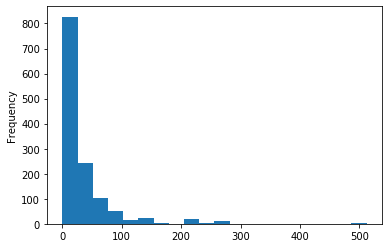

In [111]:
df.Fare.plot(kind='hist', bins=20)

In [112]:
print('skewness for age: {0:.2f}'.format(df.Age.skew()))

skewness for age: 0.41


In [113]:
print('skewness for fare: {0:.2f}'.format(df.Fare.skew()))

skewness for fare: 4.37


In [115]:
df.plot.scatter(x='Age', y='Fare', title='scatter plot: Age vs Fare');

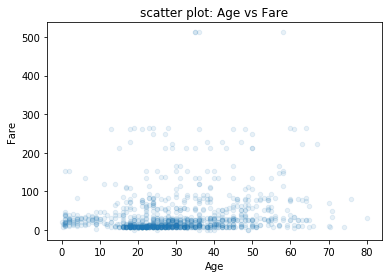

In [116]:
df.plot.scatter(x='Age', y='Fare', title='scatter plot: Age vs Fare', alpha=0.1);

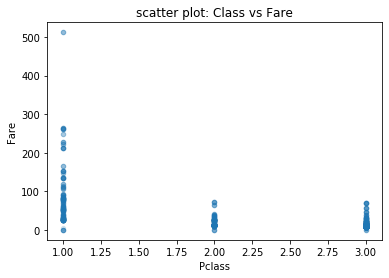

In [118]:
df.plot.scatter(x='Pclass', y='Fare', title='scatter plot: Class vs Fare', alpha=0.15);

### grouping

In [119]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [124]:
df.groupby('Sex').count()

Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Sex                                                                      
female       466     466   466  388    466    466     466   466    141   
male         843     843   843  658    843    843     843   842    154   

        Embarked  
Sex               
female       464  
male         843

In [125]:
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [127]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [128]:
df.groupby(['Pclass'])['Fare','Age'].median()

C:\Users\kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Fare   Age
Pclass               
1       60.0000  39.0
2       15.0458  29.0
3        8.0500  24.0

In [129]:
df.groupby(['Pclass']).agg({'Fare':'mean','Age':'median'})

Fare   Age
Pclass                 
1       87.508992  39.0
2       21.179196  29.0
3       13.302889  24.0

In [147]:
aggregations = {
    'Fare': {'meanFare': 'mean',
            'medianFare': 'median',
            'maxFare':max,
            'minFare':min,
            },
    
    'Age': {'medianAge':'median',
           'minAge': min,
           'maxAge': max,
           'rangeAge':lambda x: max(x)-min(x) 
           }
}

aggregations

{'Fare': {'meanFare': 'mean',
  'medianFare': 'median',
  'maxFare': <function max>,
  'minFare': <function min>},
 'Age': {'medianAge': 'median',
  'minAge': <function min>,
  'maxAge': <function max>,
  'rangeAge': <function __main__.<lambda>(x)>}}

In [148]:
df.groupby(['Pclass']).agg(aggregations)

SpecificationError: nested renamer is not supported

In [145]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

## crosstabs

In [150]:
pd.crosstab(df.Sex, df.Pclass)

Pclass    1    2    3
Sex                  
female  144  106  216
male    179  171  493

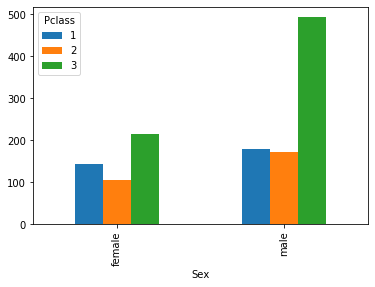

In [151]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar')

## pivots

In [152]:
df.pivot_table(index='Sex', columns='Pclass',values='Age', aggfunc='mean')

Pclass          1          2          3
Sex                                    
female  37.037594  27.499223  22.185329
male    41.029272  30.815380  25.962264

In [153]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [154]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass          1          2          3
Sex                                    
female  37.037594  27.499223  22.185329
male    41.029272  30.815380  25.962264

## Data Munging: missing values

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [156]:
#feature :embarked

In [157]:
df[df.Embarked.isnull()]

Survived  Pclass                                       Name  \
PassengerId                                                                
62                  1       1                        Icard, Miss. Amelie   
830                 1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

                Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
PassengerId                                                           
62           female  38.0      0      0  113572  80.0   B28      NaN  
830          female  62.0      0      0  113572  80.0   B28      NaN

In [158]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [159]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

In [162]:
# impute the missing value with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)

In [161]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [163]:
df.Embarked.fillna('C', inplace=True)

In [164]:
df[df.Embarked.isnull()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [166]:
df[df.Fare.isnull()]

Survived  Pclass                Name   Sex   Age  SibSp  Parch  \
PassengerId                                                                   
1044             -888       3  Storey, Mr. Thomas  male  60.5      0      0   

            Ticket  Fare Cabin Embarked  
PassengerId                              
1044          3701   NaN   NaN        S

In [167]:
median_fare = df.loc[(df.Pclass ==3) & (df.Embarked == 'S'),'Fare'].median()
print(median_fare)

8.05


In [168]:
df.Fare.fillna(median_fare, inplace=True)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [171]:
pd.options.display.max_rows =15

### Feature:Age

In [173]:
pd.options.display.max_rows =15
df[df.Age.isnull()]

Survived  Pclass                             Name     Sex  Age  \
PassengerId                                                                   
6                   0       3                 Moran, Mr. James    male  NaN   
18                  1       2     Williams, Mr. Charles Eugene    male  NaN   
20                  1       3          Masselmani, Mrs. Fatima  female  NaN   
27                  0       3          Emir, Mr. Farred Chehab    male  NaN   
29                  1       3    O'Dwyer, Miss. Ellen "Nellie"  female  NaN   
...               ...     ...                              ...     ...  ...   
1300             -888       3  Riordan, Miss. Johanna Hannah""  female  NaN   
1302             -888       3           Naughton, Miss. Hannah  female  NaN   
1305             -888       3               Spector, Mr. Woolf    male  NaN   
1308             -888       3              Ware, Mr. Frederick    male  NaN   
1309             -888       3         Peter, Master. Michael J    male  NaN   

             SibSp  Parch     Ticket     Fare Cabin Embarked  
PassengerId                                                   
6                0      0     330877   8.4583   NaN        Q  
18               0      0     244373  13.0000   NaN        S  
20               0      0       2649   7.2250   NaN        C  
27               0      0       2631   7.2250   NaN        C  
29               0      0     330959   7.8792   NaN        Q  
...            ...    ...        ...      ...   ...      ...  
1300             0      0     334915   7.7208   NaN        Q  
1302             0      0     365237   7.7500   NaN        Q  
1305             0      0  A.5. 3236   8.0500   NaN        S  
1308             0      0     359309   8.0500   NaN        S  
1309             1      1       2668  22.3583   NaN        C  

[263 rows x 11 columns]

#### option1


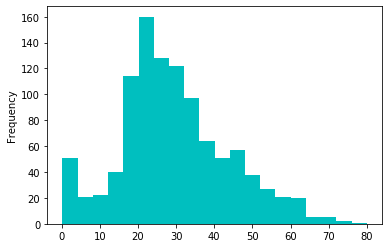

In [174]:
df.Age.plot(kind='hist',bins=20,color='c');

In [175]:
df.Age.mean()

29.881137667304014

issue due to few high values of 70 and 80

In [176]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

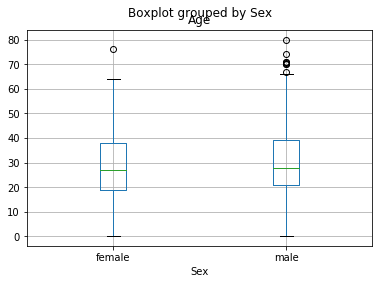

In [177]:
df[df.Age.notnull()].boxplot('Age','Sex')

In [179]:
# age_sex_median =df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace=True)

In [180]:
# option3 replace with median age of Pclass

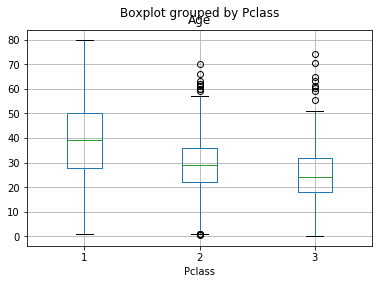

In [181]:
df[df.Age.notnull()].boxplot('Age','Pclass')

In [182]:
#age_class_median = df.groupby('Pclass').Age.transform('median')
#df.Age.fillna(age_class_median, inplace=True)

#### option4 replace with median age of title

In [183]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [189]:
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title=first_name_with_title.split('.')[0]
    title=title.strip().lower()
    return title

In [190]:
df.Name.map(lambda x : GetTitle(x))


PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [191]:
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [192]:
def GetTitle(name):
    title_group = {'mr':'Mr',
                  'mrs':'Mrs',
                  'miss':'Miss',
                  'master':'Master',
                  'don':'Sir',
                  'rev':'Sir',
                  'dr':'Officer',
                  'mme':'Mrs',
                  'ms':'Mrs',
                  'major':'Officer',
                  'lady':'Lady',
                  'sir':'Sir',
                  'mlle':'Miss',
                   'col':'Officer',
                   'capt':'Officer',
                   'the countess':'Lady',
                   'jonkheer':'Sir',
                   'dona':'Lady'
                  }
    first_name_with_title=name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [193]:
df['Title'] = df.Name.map(lambda x :GetTitle(x))

In [194]:
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked Title  
PassengerId                                                                
1                1      0         A/5 21171   7.2500   NaN        S    Mr  
2                1      0          PC 17599  71.2833   C85        C   Mrs  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
4                1      0            113803  53.1000  C123        S   Mrs  
5                0      0            373450   8.0500   NaN        S    Mr

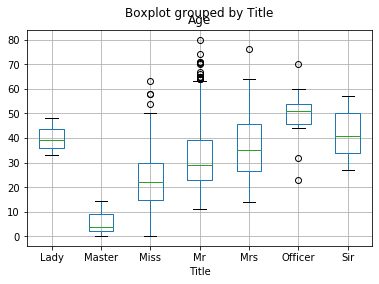

In [195]:
df[df.Age.notnull()].boxplot('Age','Title');

In [197]:
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace=True)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
 11  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


### Outliers

biased model

Outlier detection - histogram, boxplot, scatter plot 

Outlier treatment - removal, transformation, binning, imputation, ... 

Age

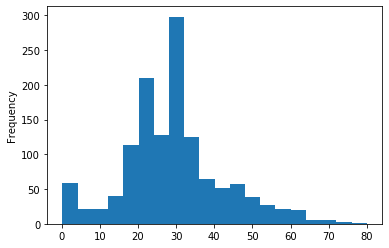

In [200]:
df.Age.plot(kind='hist', bins=20);

In [201]:
df.loc[df.Age >70]

Survived  Pclass  \
PassengerId                     
97                  0       1   
117                 0       3   
494                 0       1   
631                 1       1   
852                 0       3   
988              -888       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
97                                   Goldschmidt, Mr. George B    male  71.0   
117                                       Connors, Mr. Patrick    male  70.5   
494                                    Artagaveytia, Mr. Ramon    male  71.0   
631                       Barkworth, Mr. Algernon Henry Wilson    male  80.0   
852                                        Svensson, Mr. Johan    male  74.0   
988          Cavendish, Mrs. Tyrell William (Julia Florence...  female  76.0   

             SibSp  Parch    Ticket     Fare Cabin Embarked Title  
PassengerId                                                        
97               0      0  PC 17754  34.6542    A5        C    Mr  
117              0      0    370369   7.7500   NaN        Q    Mr  
494              0      0  PC 17609  49.5042   NaN        C    Mr  
631              0      0     27042  30.0000   A23        S    Mr  
852              0      0    347060   7.7750   NaN        S    Mr  
988              1      0     19877  78.8500   C46        S   Mrs

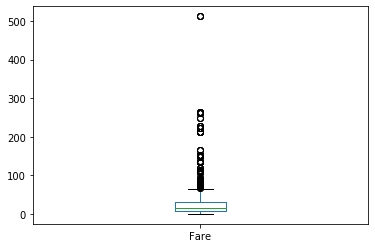

In [204]:
#Fare
df.Fare.plot(kind='box');

In [205]:
df.loc[df.Fare > 400]

Survived  Pclass  \
PassengerId                     
259                 1       1   
680                 1       1   
738                 1       1   
1235             -888       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
259                                           Ward, Miss. Anna  female  35.0   
680                         Cardeza, Mr. Thomas Drake Martinez    male  36.0   
738                                     Lesurer, Mr. Gustave J    male  35.0   
1235         Cardeza, Mrs. James Warburton Martinez (Charlo...  female  58.0   

             SibSp  Parch    Ticket      Fare        Cabin Embarked Title  
PassengerId                                                                
259              0      0  PC 17755  512.3292          NaN        C  Miss  
680              0      1  PC 17755  512.3292  B51 B53 B55        C    Mr  
738              0      0  PC 17755  512.3292         B101        C    Mr  
1235             0      1  PC 17755  512.3292  B51 B53 B55        C   Mrs

In [206]:
df.loc[df.Fare == df.Fare.max()]

Survived  Pclass  \
PassengerId                     
259                 1       1   
680                 1       1   
738                 1       1   
1235             -888       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
259                                           Ward, Miss. Anna  female  35.0   
680                         Cardeza, Mr. Thomas Drake Martinez    male  36.0   
738                                     Lesurer, Mr. Gustave J    male  35.0   
1235         Cardeza, Mrs. James Warburton Martinez (Charlo...  female  58.0   

             SibSp  Parch    Ticket      Fare        Cabin Embarked Title  
PassengerId                                                                
259              0      0  PC 17755  512.3292          NaN        C  Miss  
680              0      1  PC 17755  512.3292  B51 B53 B55        C    Mr  
738              0      0  PC 17755  512.3292         B101        C    Mr  
1235             0      1  PC 17755  512.3292  B51 B53 B55        C   Mrs

In [207]:
LogFare = np.log(df.Fare + 1.0)

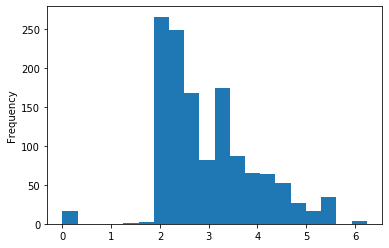

In [208]:
LogFare.plot(kind='hist', bins=20);

In [209]:
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [210]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

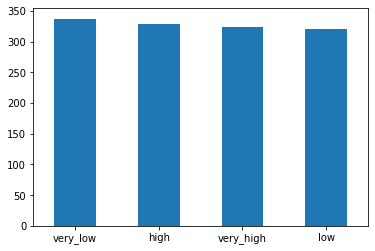

In [211]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar',rot=0)

In [212]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

In [213]:
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked Title  \
PassengerId                                                                 
1                1      0         A/5 21171   7.2500   NaN        S    Mr   
2                1      0          PC 17599  71.2833   C85        C   Mrs   
3                0      0  STON/O2. 3101282   7.9250   NaN        S  Miss   
4                1      0            113803  53.1000  C123        S   Mrs   
5                0      0            373450   8.0500   NaN        S    Mr   

              Fare_Bin  
PassengerId             
1             very_low  
2            very_high  
3                  low  
4            very_high  
5                  low

## Feature Engineering

Feature Age State

In [214]:
df['AgeState'] = np.where(df.Age >= 18, 'Adult', 'Child')

In [215]:
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [216]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState  Adult  Child
Survived              
0           495     54
1           279     63

Feature FamilySize

In [217]:
df['FamilySize'] = df.Parch + df.SibSp + 1

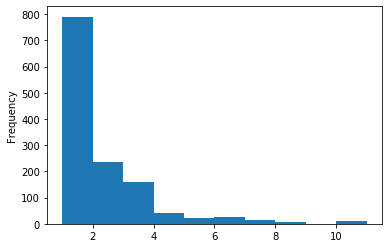

In [218]:
df['FamilySize'].plot(kind='hist')

In [220]:
df.loc[df.FamilySize == df.FamilySize.max(), ['Name','Survived','FamilySize','Ticket']] 

Name  Survived  FamilySize    Ticket
PassengerId                                                                   
160                 Sage, Master. Thomas Henry         0          11  CA. 2343
181               Sage, Miss. Constance Gladys         0          11  CA. 2343
202                        Sage, Mr. Frederick         0          11  CA. 2343
325                   Sage, Mr. George John Jr         0          11  CA. 2343
793                    Sage, Miss. Stella Anna         0          11  CA. 2343
847                   Sage, Mr. Douglas Bullen         0          11  CA. 2343
864          Sage, Miss. Dorothy Edith "Dolly"         0          11  CA. 2343
1080                           Sage, Miss. Ada      -888          11  CA. 2343
1234                     Sage, Mr. John George      -888          11  CA. 2343
1252               Sage, Master. William Henry      -888          11  CA. 2343
1257            Sage, Mrs. John (Annie Bullen)      -888          11  CA. 2343

In [221]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize   1   2   3   4   5   6   7   8   11
Survived                                       
0           374  72  43   8  12  19   8   6   7
1           163  89  59  21   3   3   4   0   0

Feature IsMother

In [222]:
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1,0)

In [223]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother    0   1
Survived         
0         533  16
1         303  39

Deck

In [224]:
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [225]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [226]:
df.loc[df.Cabin == 'T']

Survived  Pclass                          Name   Sex   Age  \
PassengerId                                                               
340                 0       1  Blackwell, Mr. Stephen Weart  male  45.0   

             SibSp  Parch  Ticket  Fare Cabin Embarked Title   Fare_Bin  \
PassengerId                                                               
340              0      0  113784  35.5     T        S    Mr  very_high   

            AgeState  FamilySize  IsMother  
PassengerId                                 
340            Adult           1         0

In [227]:
df.loc[df.Cabin == 'T', 'Cabin'] = np.nan

In [228]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [229]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(),'z')

df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [230]:
df.Deck.value_counts()

z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [231]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck      A   B   C   D   E  F  G    z
Survived                              
0         8  12  24   8   8  5  2  482
1         7  35  35  25  24  8  2  206

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1309 non-null   int64   
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Ticket      1309 non-null   object  
 8   Fare        1309 non-null   float64 
 9   Cabin       294 non-null    object  
 10  Embarked    1309 non-null   object  
 11  Title       1309 non-null   object  
 12  Fare_Bin    1309 non-null   category
 13  AgeState    1309 non-null   object  
 14  FamilySize  1309 non-null   int64   
 15  IsMother    1309 non-null   int32   
 16  Deck        1309 non-null   object  
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


## Categorical Feature Encoding

Binary encoding (True, False, -> 1,0)

Label encoding (1,2,3,...) ?? not so recommended

One-Hot encoding -get_dummies

In [233]:
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [234]:
df = pd.get_dummies(df, columns=['Deck', 'Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Name                1309 non-null   object 
 2   Sex                 1309 non-null   object 
 3   Age                 1309 non-null   float64
 4   SibSp               1309 non-null   int64  
 5   Parch               1309 non-null   int64  
 6   Ticket              1309 non-null   object 
 7   Fare                1309 non-null   float64
 8   Cabin               294 non-null    object 
 9   FamilySize          1309 non-null   int64  
 10  IsMother            1309 non-null   int32  
 11  IsMale              1309 non-null   int32  
 12  Deck_A              1309 non-null   uint8  
 13  Deck_B              1309 non-null   uint8  
 14  Deck_C              1309 non-null   uint8  
 15  Deck_D              1309 non-null   uint8  
 16  Deck_E

## drop and reorder columns

In [236]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis =1, inplace =True)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Age                 1309 non-null   float64
 2   Fare                1309 non-null   float64
 3   FamilySize          1309 non-null   int64  
 4   IsMother            1309 non-null   int32  
 5   IsMale              1309 non-null   int32  
 6   Deck_A              1309 non-null   uint8  
 7   Deck_B              1309 non-null   uint8  
 8   Deck_C              1309 non-null   uint8  
 9   Deck_D              1309 non-null   uint8  
 10  Deck_E              1309 non-null   uint8  
 11  Deck_F              1309 non-null   uint8  
 12  Deck_G              1309 non-null   uint8  
 13  Deck_z              1309 non-null   uint8  
 14  Pclass_1            1309 non-null   uint8  
 15  Pclass_2            1309 non-null   uint8  
 16  Pclass

In [238]:
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [239]:
df

Survived   Age      Fare  FamilySize  IsMother  IsMale  Deck_A  \
PassengerId                                                                   
1                   0  22.0    7.2500           2         0       1       0   
2                   1  38.0   71.2833           2         0       0       0   
3                   1  26.0    7.9250           1         0       0       0   
4                   1  35.0   53.1000           2         0       0       0   
5                   0  35.0    8.0500           1         0       1       0   
...               ...   ...       ...         ...       ...     ...     ...   
1305             -888  29.0    8.0500           1         0       1       0   
1306             -888  39.0  108.9000           1         0       0       0   
1307             -888  38.5    7.2500           1         0       1       0   
1308             -888  29.0    8.0500           1         0       1       0   
1309             -888   4.0   22.3583           3         0       1       0   

             Deck_B  Deck_C  Deck_D  ...  Title_Sir  Fare_Bin_very_low  \
PassengerId                          ...                                 
1                 0       0       0  ...          0                  1   
2                 0       1       0  ...          0                  0   
3                 0       0       0  ...          0                  0   
4                 0       1       0  ...          0                  0   
5                 0       0       0  ...          0                  0   
...             ...     ...     ...  ...        ...                ...   
1305              0       0       0  ...          0                  0   
1306              0       1       0  ...          0                  0   
1307              0       0       0  ...          0                  1   
1308              0       0       0  ...          0                  0   
1309              0       0       0  ...          0                  0   

             Fare_Bin_low  Fare_Bin_high  Fare_Bin_very_high  Embarked_C  \
PassengerId                                                                
1                       0              0                   0           0   
2                       0              0                   1           1   
3                       1              0                   0           0   
4                       0              0                   1           0   
5                       1              0                   0           0   
...                   ...            ...                 ...         ...   
1305                    1              0                   0           0   
1306                    0              0                   1           1   
1307                    0              0                   0           0   
1308                    1              0                   0           0   
1309                    0              1                   0           1   

             Embarked_Q  Embarked_S  AgeState_Adult  AgeState_Child  
PassengerId                                                          
1                     0           1               1               0  
2                     0           0               1               0  
3                     0           1               1               0  
4                     0           1               1               0  
5                     0           1               1               0  
...                 ...         ...             ...             ...  
1305                  0           1               1               0  
1306                  0           0               1               0  
1307                  0           1               1               0  
1308                  0           1               1               0  
1309                  0           0               0               1  

[1309 rows x 33 columns]

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Age                 1309 non-null   float64
 2   Fare                1309 non-null   float64
 3   FamilySize          1309 non-null   int64  
 4   IsMother            1309 non-null   int32  
 5   IsMale              1309 non-null   int32  
 6   Deck_A              1309 non-null   uint8  
 7   Deck_B              1309 non-null   uint8  
 8   Deck_C              1309 non-null   uint8  
 9   Deck_D              1309 non-null   uint8  
 10  Deck_E              1309 non-null   uint8  
 11  Deck_F              1309 non-null   uint8  
 12  Deck_G              1309 non-null   uint8  
 13  Deck_z              1309 non-null   uint8  
 14  Pclass_1            1309 non-null   uint8  
 15  Pclass_2            1309 non-null   uint8  
 16  Pclass

## Save Processed Dataset

In [247]:
processed_data_path = os.path.join(os.path.pardir, 'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

print(processed_data_path)
print(write_train_path)
print(write_test_path)

..\data\processed
..\data\processed\train.csv
..\data\processed\test.csv


In [248]:
df.loc[df.Survived != -888].to_csv(write_train_path)

columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888, columns].to_csv(write_test_path)


### Building the data processing script

In [266]:
get_processed_data_script_file = os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [267]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    # set the path of the raw data
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    # read the data with all default parameters
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0)
    return df



def process_data(df):
    # using the method chaining concept
    return (df
         # create title attribute - then add this 
         .assign(Title = lambda x: x.Name.map(get_title))
         # working missing values - start with this
         .pipe(fill_missing_values)
         # create fare bin feature
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
         # create age state
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult','Child'))
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))
          # create deck feature
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin)) 
         .assign(Deck = lambda x : x.Cabin.map(get_deck))
         # feature encoding 
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
         # add code to drop unnecessary columns
         .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1)
         # reorder columns
         .pipe(reorder_columns)
         )

def get_title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    # embarked
    df.Embarked.fillna('C', inplace=True)
    # fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median , inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df 

    
def write_data(df):
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    # train data
    df[df.Survived != -888].to_csv(write_train_path) 
    # test data
    columns = [column for column in df.columns if column != 'Survived']
    df[df.Survived == -888][columns].to_csv(write_test_path) 

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Writing ..\src\data\get_processed_data.py


In [ ]:
!python $get_processed_data_script_file

## Advanced visuallization using matplotlib

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 80.,  62., 324., 426., 189., 108.,  66.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

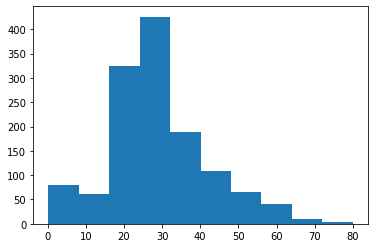

In [250]:
plt.hist(df.Age)

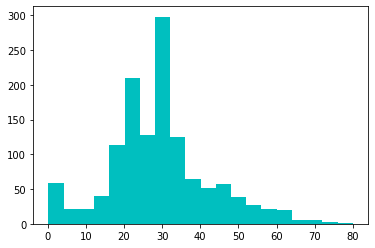

In [251]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

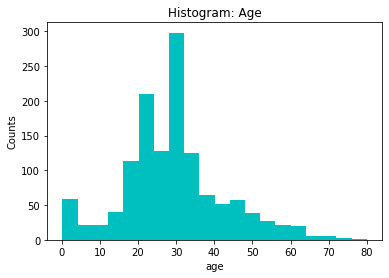

In [252]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram: Age')
plt.xlabel('age')
plt.ylabel('Counts')
plt.show()

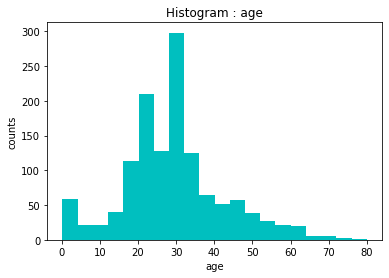

In [253]:
f, ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')

ax.set_title('Histogram : age')
ax.set_xlabel('age')
ax.set_ylabel('counts')
plt.show()

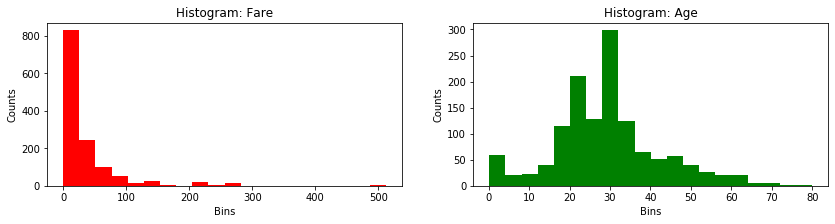

In [256]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,3))

ax1.hist(df.Fare, bins=20, color ='r')
ax1.set_title('Histogram: Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='g')
ax2.set_title('Histogram: Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

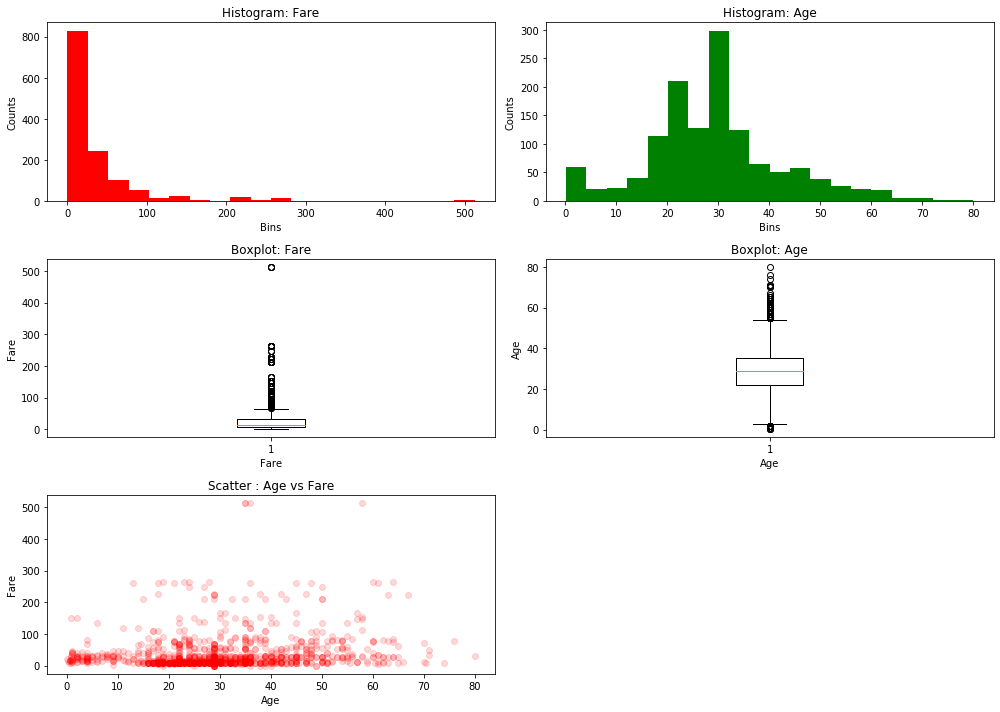

In [264]:
f, ax_arr = plt.subplots(3,2,figsize=(14,10))

ax_arr[0,0].hist(df.Fare, bins=20, color ='r')
ax_arr[0,0].set_title('Histogram: Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

ax_arr[0,1].hist(df.Age, bins=20, color='g')
ax_arr[0,1].set_title('Histogram: Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot: Fare')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot: Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

ax_arr[2,0].scatter(df.Age, df.Fare, alpha=0.15, color ='r')
ax_arr[2,0].set_title('Scatter : Age vs Fare' )
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')

plt.tight_layout()

plt.show()

